In [ ]:
# - - - Annotated Metadata of patients - - -

patient_metadata = [{"ID" : "P-0016773-T01-IM6", "AGE" : "77", "GENDER" : "F", "TUMOUR LOCATION" : "DUCTAL CARCINOMA",                  "ETHNICITY" : "UNKOWN",     "ENVIRONMENTAL VARIABLES" : "UNKOWN",             "THERAPY" : "SAMPLE ANALYSED BEFORE TREATMENT"},
                    {"ID" : "P-0005900-T01-IM5", "AGE" : "32", "GENDER" : "F", "TUMOUR LOCATION" : "UNKOWN",                            "ETHNICITY" : "UNKOWN",     "ENVIRONMENTAL VARIABLES" : "UNKOWN",             "THERAPY" : "UNKOWN"},
                    {"ID" : "P-0007685-T01-IM5", "AGE" : "50", "GENDER" : "F", "TUMOUR LOCATION" : "DUCTOLOBULAR CARCINOMA",            "ETHNICITY" : "UNKOWN",     "ENVIRONMENTAL VARIABLES" : "UNKOWN",             "THERAPY" : "UNKOWN"},
                    {"ID" : "PMSNH1002",         "AGE" : "62", "GENDER" : "F", "TUMOUR LOCATION" : "BASAL (TRIPLE NEGATIVE) CARCINOMA", "ETHNICITY" : "ASIAN",      "ENVIRONMENTAL VARIABLES" : "UNKOWN",             "THERAPY" : "UNKOWN"},
                    {"ID" : "DN12100",           "AGE" : "37", "GENDER" : "F", "TUMOUR LOCATION" : "HER-POSITIVE CARCINOMA",            "ETHNICITY" : "WHITE",      "ENVIRONMENTAL VARIABLES" : "UNKOWN",             "THERAPY" : "UNKOWN"},
                    {"ID" : "P-0000216-T02-IM3", "AGE" : "66", "GENDER" : "F", "TUMOUR LOCATION" : "UNKOWN",                            "ETHNICITY" : "UNKOWN",     "ENVIRONMENTAL VARIABLES" : "UNKOWN",             "THERAPY" : "UNKOWN"},
                    {"ID" : "PMSNH0902",         "AGE" : "47", "GENDER" : "F", "TUMOUR LOCATION" : "BASAL (TRIPLE NEGATIVE) CARCINOMA", "ETHNICITY" : "ASIAN",      "ENVIRONMENTAL VARIABLES" : "UNKOWN",             "THERAPY" : "UNKOWN"},
                    {"ID" : "P-0002682-T01-IM3", "AGE" : "72", "GENDER" : "F", "TUMOUR LOCATION" : "LOBULAR CARCINOMA",                 "ETHNICITY" : "UNKOWN",     "ENVIRONMENTAL VARIABLES" : "UNKOWN",             "THERAPY" : "UNKOWN"},
                    {"ID" : "HCC1395",           "AGE" : "43", "GENDER" : "F", "TUMOUR LOCATION" : "UNKOWN",                            "ETHNICITY" : "CAUCASIAN",  "ENVIRONMENTAL VARIABLES" : "UNKOWN",             "THERAPY" : "UNKOWN"},
                    {"ID" : "P-0000438-T01-IM3", "AGE" : "47", "GENDER" : "F", "TUMOUR LOCATION" : "DUCTOLOBULAR CARCINOMA",            "ETHNICITY" : "UNKOWN",     "ENVIRONMENTAL VARIABLES" : "UNKOWN",             "THERAPY" : "UNKOWN"},
                    {"ID" : "BC26",              "AGE" : "36", "GENDER" : "F", "TUMOUR LOCATION" : "UNKOWN",                            "ETHNICITY" : "UNKOWN",     "ENVIRONMENTAL VARIABLES" : "UNKOWN",             "THERAPY" : "UNKOWN"},
                    {"ID" : "P-0008901-T01-IM5", "AGE" : "45", "GENDER" : "F", "TUMOUR LOCATION" : "UNKOWN",                            "ETHNICITY" : "UNKOWN",     "ENVIRONMENTAL VARIABLES" : "UNKOWN",             "THERAPY" : "UNKOWN"},
                    {"ID" : "2943814",           "AGE" : "58", "GENDER" : "F", "TUMOUR LOCATION" : "UNKOWN",                            "ETHNICITY" : "BRAZALIAN",  "ENVIRONMENTAL VARIABLES" : "PESTICIDE EXPOSURE", "THERAPY" : "UNKOWN"},
                    {"ID" : "2943824",           "AGE" : "68", "GENDER" : "F", "TUMOUR LOCATION" : "UNKOWN",                            "ETHNICITY" : "BRAZALIAN",  "ENVIRONMENTAL VARIABLES" : "PESTICIDE EXPOSURE", "THERAPY" : "ADJUVANT CHEMOTHERAPY"},
                    {"ID" : "2943832",           "AGE" : "44", "GENDER" : "F", "TUMOUR LOCATION" : "UNKOWN",                            "ETHNICITY" : "BRAZALIAN",  "ENVIRONMENTAL VARIABLES" : "PESTICIDE EXPOSURE", "THERAPY" : "NEO-ADJUVANT THERAPY"},
                    {"ID" : "P-0004824-T01-IM5", "AGE" : "35", "GENDER" : "F", "TUMOUR LOCATION" : "UNKOWN",                            "ETHNICITY" : "UNKOWN",     "ENVIRONMENTAL VARIABLES" : "UNKOWN",             "THERAPY" : "UNKOWN"},
                    {"ID" : "P-0005205-T02-IM6", "AGE" : "35", "GENDER" : "F", "TUMOUR LOCATION" : "UNKOWN",                            "ETHNICITY" : "UNKOWN",     "ENVIRONMENTAL VARIABLES" : "UNKOWN",             "THERAPY" : "UNKOWN"},
                    {"ID" : "2687075",           "AGE" : "71", "GENDER" : "F", "TUMOUR LOCATION" : "LOBULAR CARCINOMA",                 "ETHNICITY" : "UNKOWN",     "ENVIRONMENTAL VARIABLES" : "UNKOWN",             "THERAPY" : "UNKOWN"},
                    {"ID" : "2974352",           "AGE" : "60", "GENDER" : "F", "TUMOUR LOCATION" : "LOBULAR CARCINOMA",                 "ETHNICITY" : "UNKOWN",     "ENVIRONMENTAL VARIABLES" : "UNKOWN",             "THERAPY" : "UNKOWN"}
]

print(f"Metadata available for {len(patient_metadata)} patients")

Metadata available for 19 patients


In [ ]:
# - - - Immutable, Hashable Dataclass for Mutations - - -

from dataclasses import dataclass


@dataclass(frozen=True)
class Mutation:
  cds  : str   # - - - nucleotide
  aa   : str   # - - - amino acid
  pos  : int   # - - - position
  kind : str   # - - - kind of mutation

  # - - - rich string description of the mutation
  def toString(self) -> str:
    description : str = f"{self.kind} At position {self.pos}, "
    # - - - DNA level
    if '>' in self.cds:
      reference, alternate = self.cds[2:].split('>')
      description += f"nucleotide changes from {reference} to {alternate}, "
    elif 'del' in self.cds:
      description += f"nucleotide deletion ({self.cds[2:]}), "
    elif 'ins' in self.cds:
      description += f"nucleotide insertion ({self.cds[2:]}), "
    else:
      description += f"CDS change ({self.cds}), "
    # - - - AA level
    if 'fs' in self.aa:  # frameshift
      description += f"causing a frameshift leading to {self._parse_ter(self.aa)}."
    elif 'Ter' in self.aa:
      description += f"creating a premature stop codon at {self._parse_ter(self.aa)}."
    elif 'del' in self.aa:
      description += f"amino acid deletion: {self.aa[2:]}."
    else:
      description += f"amino acid change: {self.aa[2:]}."
    return description.strip()

  # - - - helper function to check for a stop
  def _parse_ter(self, aa_str):
    if 'Ter' in aa_str or '*' in aa_str:
      return 'stop codon ' + aa_str.split('Ter')[-1]
    return aa_str

In [ ]:
# - - - read all mutations from patient samples - - -


import os
import pandas as pd
import regex as re
from google.colab import drive


drive.mount(
    mountpoint    = '/content/drive',
    force_remount = False)
folder_path     = '/content/drive/MyDrive/PB-project'
mutations_dict  = {}

# Loop through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        print(f"Reading from {filename}")
        sample_id = filename.replace('.csv', '')
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        mutations = []

        for _, row in df.iterrows():
            aa = row.get('AA Mutation', '')
            cds = row.get('CDS Mutation', '')
            pos_field = row.get('Position', '')
            kinds = row.get('Type', '')

            match = re.search(r":(\d+)", str(pos_field))
            pos = int(match.group(1)) if match else -1

            mutations.append(Mutation(cds=cds, aa=aa, pos=pos, kind=kinds))

        mutations_dict[sample_id] = mutations

# check results
for sample_id, mutation_list in mutations_dict.items():
    print(f"\n{sample_id}:")
    for m in mutation_list:
        print(m)

print(len(mutations_dict.keys()))

Mounted at /content/drive
Reading from P-0016773-T01-IM6.csv
Reading from 2974352.csv
Reading from 2687075.csv
Reading from P-0007685-T01-IM5.csv
Reading from P-0004824-T01-IM5.csv
Reading from PMSNH1002.csv
Reading from DN12100.csv
Reading from 2943832.csv
Reading from P-0000216-T02-IM3.csv
Reading from 2943824.csv
Reading from PMSNH0902.csv
Reading from 2943814.csv
Reading from P-0005900-T01-IM5.csv
Reading from P-0008901-T01-IM5.csv
Reading from BC26.csv
Reading from HCC1395.csv
Reading from P-0002682-T01-IM3.csv
Reading from P-0000438-T01-IM3.csv
Reading from P0005205-T02-IM6.csv

P-0016773-T01-IM6:
Mutation(cds='c.10G>T', aa='p.G4*', pos=32316470, kind='Substitution - Nonsense')
Mutation(cds='c.1158A>T', aa='p.E386D', pos=32332636, kind='Substitution - Missense')
Mutation(cds='c.2947C>A', aa='p.P983T', pos=32337302, kind='Substitution - Missense')
Mutation(cds='c.3154G>A', aa='p.A1052T', pos=32337509, kind='Substitution - Missense')
Mutation(cds='c.5855T>A', aa='p.L1952*', pos=323

In [ ]:
# - - - (MUTATION VS FREQUENCY MATRIX) - - -

def getAllMutations(MUTATION_RAW : dict) -> set :
  allMutations : set = set()
  for mutations in MUTATION_RAW.values():
    allMutations.update(mutations)
  return allMutations

def makeDataFrame(MUTATION_RAW : dict, MUTATIONS : set) -> pd.DataFrame:
  samples       = list(MUTATION_RAW.keys())
  mutationIndex = sorted(MUTATIONS, key = lambda m: (m.pos, m.cds, m.aa))
  frame         = pd.DataFrame(0, index = mutationIndex, columns = samples)

  # - - - Add data
  for sample, mutations in MUTATION_RAW.items():
    for mutation in mutations:
      frame.at[mutation, sample] = 1

  # - - - Add a frequency column, (sum is total number of samples expressing it)
  frame['Frequency']  = frame.sum(axis = 1)
  frame.columns.name  = None

  return frame


def extractMutationMetadata(MUTATION_INDEX : list) -> pd.DataFrame:
  data = [{
      'cds'  : m.cds,
      'aa'   : m.aa,
      'pos'  : m.pos,
      'kind' : m.kind
  } for m in MUTATION_INDEX]
  return pd.DataFrame(data)


# - - - result
all_mutations = getAllMutations(mutations_dict)
mutation_frequency_matrix = makeDataFrame(mutations_dict, all_mutations)

print("Mutation Frequency Matrix:")
print(mutation_frequency_matrix.to_string())

Mutation Frequency Matrix:
                                                                                                               P-0016773-T01-IM6  2974352  2687075  P-0007685-T01-IM5  P-0004824-T01-IM5  PMSNH1002  DN12100  2943832  P-0000216-T02-IM3  2943824  PMSNH0902  2943814  P-0005900-T01-IM5  P-0008901-T01-IM5  BC26  HCC1395  P-0002682-T01-IM3  P-0000438-T01-IM3  P0005205-T02-IM6  Frequency
Mutation(cds='c.10G>T', aa='p.G4*', pos=32316470, kind='Substitution - Nonsense')                                              1        0        0                  0                  0          0        0        0                  0        0          0        0                  0                  0     0        0                  0                  0                 0          1
Mutation(cds='c.217C>T', aa='p.Q73*', pos=32319226, kind='Substitution - Nonsense')                                            0        0        0                  0                  0          0        0     

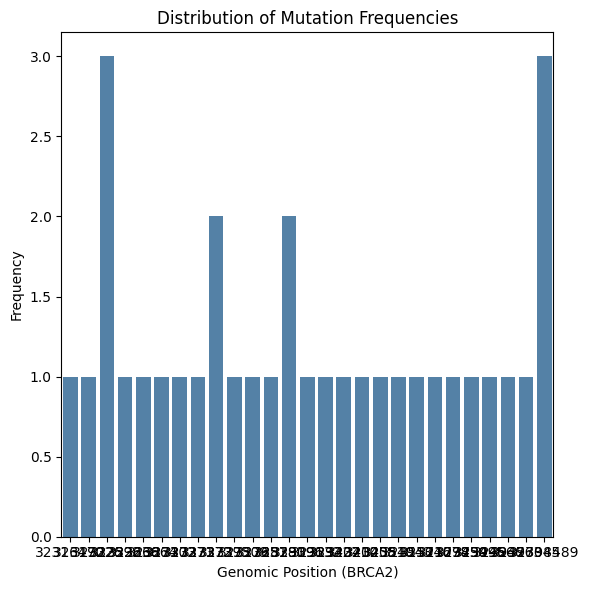

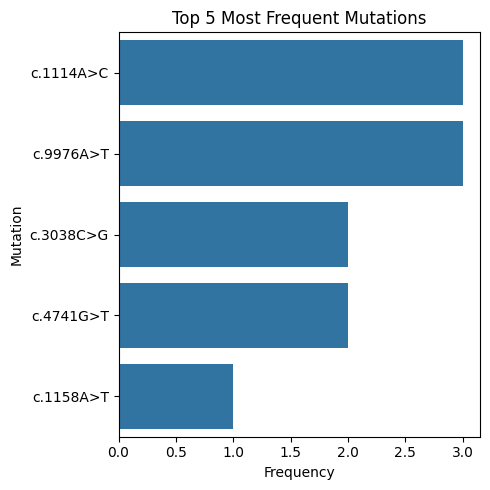

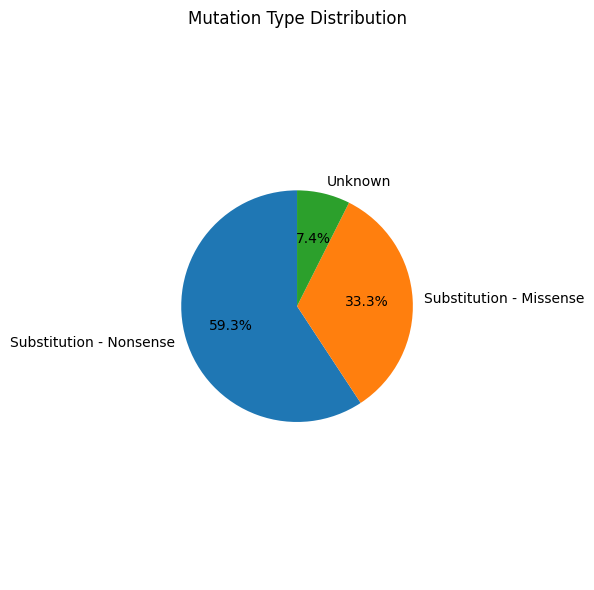

<ipython-input-5-be0fe65db7a1>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  substitution_df['change'] = substitution_df['cds'].str.extract(r'([ATGC]>[ATGC])')


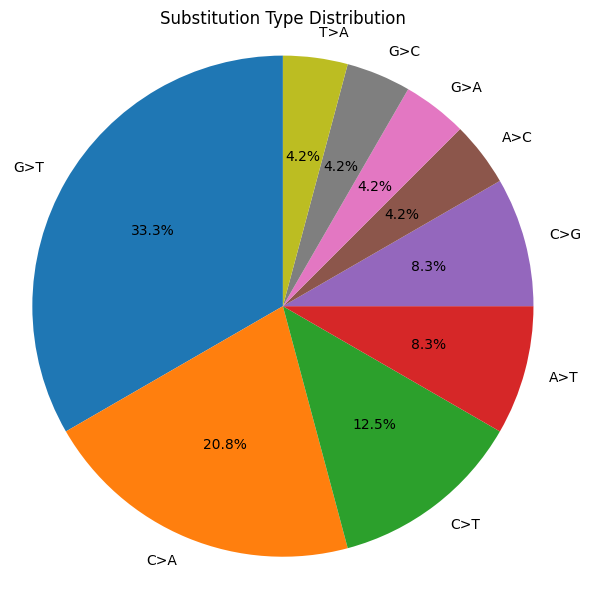

In [ ]:
# - - - (MUTATION VS FREQUENCY VISUALIZATION) - - -

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# - - - class to get visualization
class MutationVisualizer:
  def __init__(self, MUT_FREQ_MATRIX : pd.DataFrame):
    self.frame      = MUT_FREQ_MATRIX.copy()
    self.metaFrame  = self._extract_mutation_metadata()


  # - - - helper private function to get mutation metadata
  def _extract_mutation_metadata(self) -> pd.DataFrame:
    data = [{
        'cds'  : m.cds,
        'aa'   : m.aa,
        'pos'  : m.pos,
        'kind' : m.kind
    } for m in self.frame.index]
    dataFrame = pd.DataFrame(data)
    dataFrame['Frequency'] = self.frame['Frequency'].values
    return dataFrame


  # - - - get histogram : mutation vs frequency
  def plotMutationFrequencyHistogram(self, FILENAME : str = "MutationHistogram.png") :
    positions   = [mutation.pos for mutation in self.frame.index]
    frequencies = self.frame['Frequency'].values
    labels      = [mutation.cds for mutation in self.frame.index]

    plt.figure(figsize = (6, 6))
    sns.barplot(
        x       = positions,
        y       = frequencies,
        color   = "steelblue"
    )
    plt.xlabel("Genomic Position (BRCA2)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Mutation Frequencies")
    plt.tight_layout()
    plt.savefig(FILENAME)
    plt.show()
    plt.close()


  # - - - get top k mutations only
  def plotTopKMutations(self, K : int = 5, FILENAME : str = "TopKMutations.png") :
    top    = self.frame.sort_values('Frequency', ascending = False).head(K).copy()
    labels = [mutation.cds for mutation in top.index]

    plt.figure(figsize=(5, 5))
    sns.barplot(
        x       = top['Frequency'],
        y       = labels)
    plt.xlabel("Frequency")
    plt.ylabel("Mutation")
    plt.title(f"Top {K} Most Frequent Mutations")
    plt.tight_layout()
    plt.savefig(FILENAME)
    plt.show()
    plt.close()


  # - - - get mutation type
  def plotMutationTypePie(self, FILENAME : str = "mutation_type_pie.png"):
    mutation_types = self.metaFrame['kind'].value_counts()
    labels         = mutation_types.index
    sizes          = mutation_types.values

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title("Mutation Type Distribution")
    plt.tight_layout()
    plt.savefig(FILENAME)
    plt.show()
    plt.close()


  # - - - get substitution type pie
  def plotSubstitutionTypePie(self, FILENAME : str = "substitution_type_pie.png"):
    substitution_df           = self.metaFrame[self.metaFrame['kind'].str.contains("Substitution", case=False, na=False)]
    substitution_df['change'] = substitution_df['cds'].str.extract(r'([ATGC]>[ATGC])')
    change_counts             = substitution_df['change'].value_counts()
    labels                    = change_counts.index
    sizes                     = change_counts.values

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title("Substitution Type Distribution")
    plt.tight_layout()
    plt.savefig(FILENAME)
    plt.show()
    plt.close()


  # - - - get frequency vs position histogram
  def plotFrequencyVsPosition(self, FILENAME : str = "frequency_vs_position.png"):
    positions   = [mutation.pos for mutation in self.frame.index]
    frequencies = self.frame['Frequency'].values
    labels      = [mutation.cds for mutation in self.frame.index]

    plt.figure(figsize=(6, 6))
    sns.barplot(
        x       = positions,
        y       = frequencies,
        color   = "steelblue"
    )
    plt.xlabel("Genomic Position (BRCA2)")


  # - - - get mutation type vs position
  def plotMutationTypeVsPosition(self, FILENAME : str = "mutation_type_vs_position.png"):
    pivot = self.meta_df.pivot_table(index='pos', columns='kind', values='Frequency', aggfunc='sum', fill_value=0)

    plt.figure(figsize=(6, 6))
    sns.heatmap(pivot.T, cmap="YlGnBu", linewidths=0.5)
    plt.xlabel("Genomic Position (BRCA2)")
    plt.ylabel("Mutation Type")
    plt.title("Mutation Type Distribution by Position")
    plt.tight_layout()
    plt.savefig(FILENAME)
    plt.show()
    plt.close()


# - - - Test - - -

mutation_visualizer = MutationVisualizer(mutation_frequency_matrix)
mutation_visualizer.plotMutationFrequencyHistogram()
mutation_visualizer.plotTopKMutations()
mutation_visualizer.plotMutationTypePie()
mutation_visualizer.plotSubstitutionTypePie()



LOWESS Plot Data Summary:
Number of positions: 27
Position range: 32316470 to 32398489
Frequency range: 1 to 3
Using LOWESS frac parameter: 0.2
Sample of raw vs smoothed values (first 5 points):
Position 32316470: Raw Freq = 1, Smoothed = 0.9999999999992153
Position 32319226: Raw Freq = 1, Smoothed = 1.0000000000000626
Position 32332592: Raw Freq = 3, Smoothed = 1.000000000001078
Position 32332636: Raw Freq = 1, Smoothed = 1.0000000000003506
Position 32336864: Raw Freq = 1, Smoothed = 1.0000000000033955


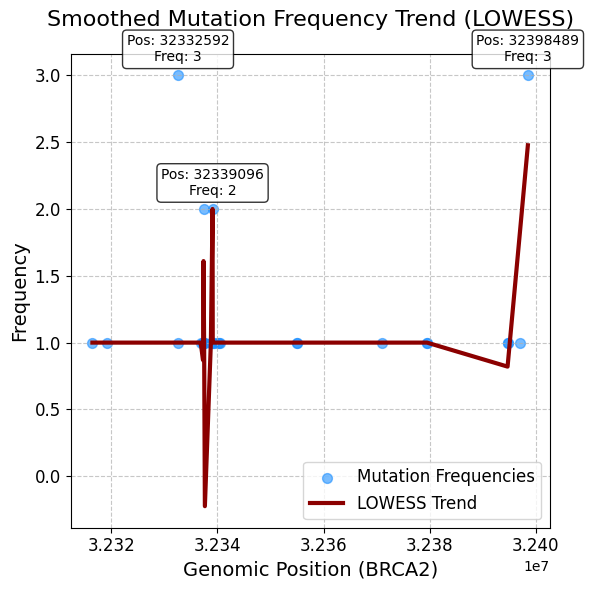

LOWESS plot saved to lowess_mutation_trend.png


In [ ]:
#  - - - LOWESS - - -


import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np
import seaborn as sns
import statsmodels.api as sm


def prepareAgeMutationData(MUTATION_MATRIX : pd.DataFrame, SAMPLE_METADATA : dict) -> pd.DataFrame:
  mutation_counts       = MUTATION_MATRIX.drop(columns='Frequency').sum(axis=0)
  metaFrame             = pd.DataFrame.from_dict(patient_metadata, orient='columns')
  metaFrame.index.name  = 'SampleID'
  metaFrame['AGE']      = pd.to_numeric(metaFrame['AGE'], errors='coerce')
  dataFrame             = metaFrame.join(mutation_counts.rename("MutationCount"))
  dataFrme              = dataFrame.dropna(subset=['AGE'])
  return dataFrame[['AGE', 'MutationCount']]


def plot_lowess_mutation_trend(matrix : pd.DataFrame, output_file: str = 'lowess_mutation_trend.png', frac: float = 0.2):
    """Plots a LOWESS smoothed curve of mutation frequencies across genomic positions with enhanced styling.

    Args:
        matrix (pd.DataFrame): Mutation frequency matrix.
        output_file (str): File path to save the plot.
        frac (float): Fraction of data to use for LOWESS smoothing (default: 0.2).
    """
    positions = np.array([mutation.pos for mutation in matrix.index])
    frequencies = matrix['Frequency'].values

    # Validate input data
    if len(positions) < 3:
        print("Warning: Insufficient data points for LOWESS smoothing (< 3 points). Skipping LOWESS plot.")
        return

    if np.any(np.isnan(positions)) or np.any(np.isnan(frequencies)):
        print("Warning: NaN values detected in positions or frequencies. Skipping LOWESS plot.")
        return

    if np.any(np.isinf(positions)) or np.any(np.isinf(frequencies)):
        print("Warning: Infinite values detected in positions or frequencies. Skipping LOWESS plot.")
        return

    # Sort positions and frequencies together
    sorted_indices = np.argsort(positions)
    positions_sorted = positions[sorted_indices]
    frequencies_sorted = frequencies[sorted_indices]

    # Debugging: Print data summary
    print(f"LOWESS Plot Data Summary:")
    print(f"Number of positions: {len(positions_sorted)}")
    print(f"Position range: {positions_sorted.min()} to {positions_sorted.max()}")
    print(f"Frequency range: {frequencies_sorted.min()} to {frequencies_sorted.max()}")
    print(f"Using LOWESS frac parameter: {frac}")

    # Handle duplicate positions by aggregating frequencies
    unique_positions, indices = np.unique(positions_sorted, return_inverse=True)
    if len(unique_positions) < len(positions_sorted):
        print("Warning: Duplicate positions detected. Aggregating frequencies by summing.")
        aggregated_frequencies = np.zeros(len(unique_positions))
        for i, idx in enumerate(indices):
            aggregated_frequencies[idx] += frequencies_sorted[i]
        positions_sorted = unique_positions
        frequencies_sorted = aggregated_frequencies

    # Ensure enough unique points after aggregation
    if len(positions_sorted) < 3:
        print("Warning: Insufficient unique positions after aggregation (< 3 points). Skipping LOWESS plot.")
        return

    try:
        # Apply LOWESS smoothing on sorted data
        smoothed = lowess(frequencies_sorted, positions_sorted, frac=frac, return_sorted=True)

        # Extract smoothed positions and values
        smoothed_positions = smoothed[:, 0]
        smoothed_values = smoothed[:, 1]

        # Debugging: Compare raw and smoothed values
        print("Sample of raw vs smoothed values (first 5 points):")
        for i in range(min(5, len(positions_sorted))):
            print(f"Position {positions_sorted[i]}: Raw Freq = {frequencies_sorted[i]}, Smoothed = {smoothed_values[i]}")

        # Create the plot with enhanced styling
        plt.figure(figsize=(6, 6))
        plt.scatter(positions_sorted, frequencies_sorted, color='dodgerblue', alpha=0.6, s=50, label='Mutation Frequencies')
        plt.plot(smoothed_positions, smoothed_values, color='darkred', linewidth=3, label='LOWESS Trend')

        # Annotate top 3 positions with highest frequencies
        top_indices = np.argsort(frequencies_sorted)[-3:]  # Get indices of top 3 frequencies
        for idx in top_indices:
            plt.annotate(
                f'Pos: {int(positions_sorted[idx])}\nFreq: {int(frequencies_sorted[idx])}',
                (positions_sorted[idx], frequencies_sorted[idx]),
                textcoords="offset points",
                xytext=(0, 10),
                ha='center',
                fontsize=10,
                color='black',
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8)
            )

        # Styling
        plt.xlabel('Genomic Position (BRCA2)', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.title('Smoothed Mutation Frequency Trend (LOWESS)', fontsize=16, pad=20)
        plt.legend(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tick_params(axis='both', labelsize=12)
        plt.tight_layout()
        plt.savefig(output_file, dpi=300)
        plt.show()
        plt.close()
        print(f"LOWESS plot saved to {output_file}")
    except Exception as e:
        print(f"Error during LOWESS smoothing: {e}. Skipping LOWESS plot.")


# - - - run
plot_lowess_mutation_trend(mutation_frequency_matrix)


Class distribution before SMOTE:
Rare mutations (frequency <= 2): 25
Common mutations (frequency > 2): 2
Error applying SMOTE: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 2, n_samples = 2

Synthetic Mutation Matrix:
                                                    P-0016773-T01-IM6  \
Mutation(cds='c.10G>T', aa='p.G4*', pos=3231647...                  1   
Mutation(cds='c.217C>T', aa='p.Q73*', pos=32319...                  0   
Mutation(cds='c.1114A>C', aa='p.N372H', pos=323...                  0   
Mutation(cds='c.1158A>T', aa='p.E386D', pos=323...                  1   
Mutation(cds='c.2509_2512delinsCAAT', aa='p.E83...                  0   
Mutation(cds='c.2947C>A', aa='p.P983T', pos=323...                  1   
Mutation(cds='c.3016G>T', aa='p.G1006*', pos=32...                  0   
Mutation(cds='c.3017G>T', aa='p.G1006V', pos=32...                  0   
Mutation(cds='c.3038C>G', aa='p.S1013*', pos=32...                  0   
Mutation(cds='c.3154G>

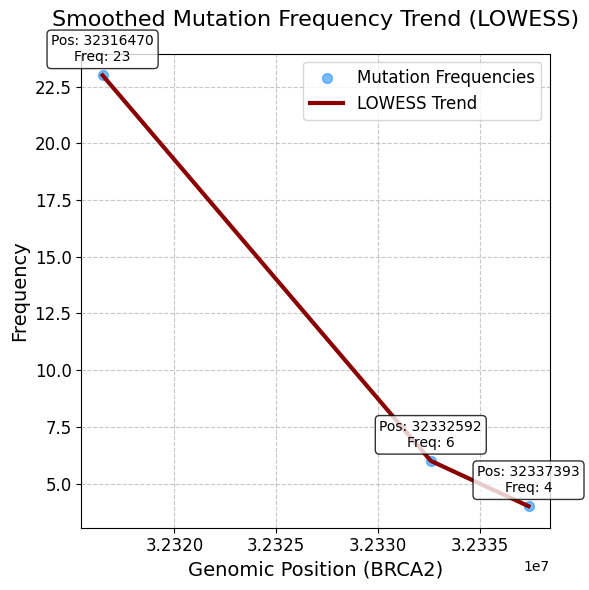

LOWESS plot saved to lowess_mutation_trend_synthetic.png


In [ ]:
# - - - SMOTE - - -

from imblearn.over_sampling import SMOTE

def apply_smote_to_mutation_matrix(matrix: pd.DataFrame, freq_threshold: int = 2) -> pd.DataFrame:
    """Applies SMOTE to the mutation frequency matrix to generate synthetic samples for rare mutations.

    Args:
        matrix (pd.DataFrame): Mutation frequency matrix with samples as columns and mutations as rows.
        freq_threshold (int): Threshold to classify mutations as rare (frequency <= threshold).

    Returns:
        pd.DataFrame: New matrix with synthetic samples added.
    """
    # Extract feature matrix (exclude 'Frequency' column)
    X = matrix.drop(columns=['Frequency']).values
    # Create target: 1 for rare mutations (frequency <= threshold), 0 for common
    y = (matrix['Frequency'] <= freq_threshold).astype(int).values

    # Debugging: Print class distribution
    print(f"Class distribution before SMOTE:")
    print(f"Rare mutations (frequency <= {freq_threshold}): {np.sum(y == 1)}")
    print(f"Common mutations (frequency > {freq_threshold}): {np.sum(y == 0)}")

    # Check if SMOTE can be applied
    if np.sum(y == 1) < 2 or np.sum(y == 0) < 2:
        print("Warning: Insufficient samples in one of the classes for SMOTE. Need at least 2 samples per class.")
        return matrix

    # Apply SMOTE
    try:
        smote = SMOTE(random_state=42, k_neighbors=min(5, np.sum(y == 1) - 1))
        X_resampled, y_resampled = smote.fit_resample(X, y)

        # Debugging: Print shapes
        print(f"Shape before SMOTE: {X.shape}")
        print(f"Shape after SMOTE: {X_resampled.shape}")

        # Round SMOTE output to binary (0 or 1) since mutation presence is binary
        X_resampled = np.round(X_resampled).astype(int)

        # Create new DataFrame
        sample_columns = matrix.columns.drop('Frequency')
        synthetic_matrix = pd.DataFrame(X_resampled, columns=sample_columns)

        # Create new indices for synthetic mutations
        original_count = len(matrix)
        new_indices = [f"SyntheticMutation_{i}" for i in range(len(synthetic_matrix))]
        synthetic_matrix.index = new_indices

        # Compute frequency for new rows
        synthetic_matrix['Frequency'] = synthetic_matrix.sum(axis=1)

        # Debugging: Print a sample of the synthetic matrix
        print("\nSample of synthetic matrix (first 5 rows):")
        print(synthetic_matrix.head())

        return synthetic_matrix
    except ValueError as e:
        print(f"Error applying SMOTE: {e}")
        return matrix

def plot_smote_frequency_distribution(original_matrix: pd.DataFrame, synthetic_matrix: pd.DataFrame, output_file: str = 'smote_frequency_distribution.png'):
    """Plots a comparison of mutation frequency distributions before and after SMOTE.

    Args:
        original_matrix (pd.DataFrame): Original mutation frequency matrix.
        synthetic_matrix (pd.DataFrame): Matrix with synthetic samples added.
        output_file (str): File path to save the plot.
    """
    plt.figure(figsize=(6, 6))

    # Plot histograms with transparency
    plt.hist(original_matrix['Frequency'], bins=range(int(original_matrix['Frequency'].max()) + 2), alpha=0.5, label='Before SMOTE', color='dodgerblue', density=True)
    plt.hist(synthetic_matrix['Frequency'], bins=range(int(synthetic_matrix['Frequency'].max()) + 2), alpha=0.5, label='After SMOTE', color='darkorange', density=True)

    # Overlay KDE plots for smoother visualization
    sns.kdeplot(original_matrix['Frequency'], color='blue', label='Before SMOTE (KDE)', linewidth=2)
    sns.kdeplot(synthetic_matrix['Frequency'], color='red', label='After SMOTE (KDE)', linewidth=2)

    # Styling
    plt.xlabel('Mutation Frequency', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title('Mutation Frequency Distribution Before and After SMOTE', fontsize=14, pad=20)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tick_params(axis='both', labelsize=10)
    plt.tight_layout()
    plt.savefig(output_file, dpi=300)
    plt.close()
    print(f"SMOTE frequency distribution plot saved to {output_file}")

# Apply SMOTE to the mutation frequency matrix
synthetic_mutation_matrix = apply_smote_to_mutation_matrix(mutation_frequency_matrix, freq_threshold=2)
print("\nSynthetic Mutation Matrix:")
print(synthetic_mutation_matrix)

# Plot the frequency distribution before and after SMOTE
plot_smote_frequency_distribution(mutation_frequency_matrix, synthetic_mutation_matrix)

# Assign positions to synthetic mutations for LOWESS plotting
# Strategy: Repeat the original positions in proportion to the synthetic samples
original_positions = [mutation.pos for mutation in mutation_frequency_matrix.index]
original_frequencies = mutation_frequency_matrix['Frequency'].values

# Create a list of Mutation objects for the synthetic matrix
synthetic_mutations = []
for idx in synthetic_mutation_matrix.index:
    # Find the original mutation with the closest frequency
    synthetic_freq = synthetic_mutation_matrix.loc[idx, 'Frequency']
    closest_idx = np.argmin(np.abs(original_frequencies - synthetic_freq))
    closest_pos = original_positions[closest_idx]
    closest_mutation = mutation_frequency_matrix.index[closest_idx]
    # Create a synthetic Mutation object with the same position
    synthetic_mutation = Mutation(
        cds=f"Synthetic_{closest_mutation.cds}",
        aa=f"Synthetic_{closest_mutation.aa}",
        pos=closest_pos,
        kind=closest_mutation.kind
    )
    synthetic_mutations.append(synthetic_mutation)

# Create a new DataFrame with synthetic Mutation objects as indices
synthetic_matrix_for_lowess = synthetic_mutation_matrix.copy()
synthetic_matrix_for_lowess.index = synthetic_mutations

# Generate LOWESS plot for synthetic data
plot_lowess_mutation_trend(synthetic_matrix_for_lowess, output_file='lowess_mutation_trend_synthetic.png', frac=0.2)

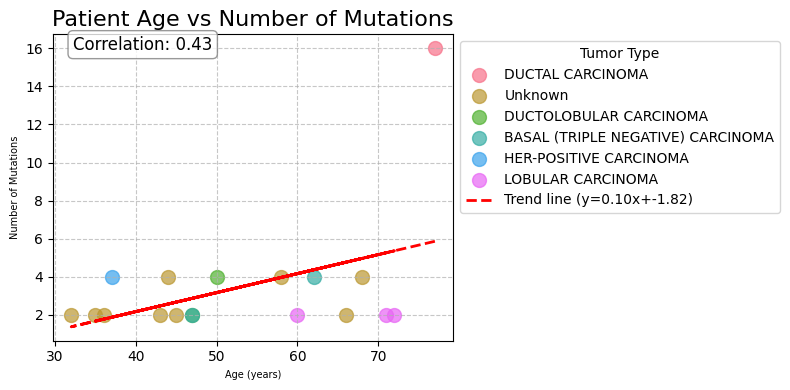

Average mutations by age group:
               mean  count
AGE_GROUP                 
30-45      2.571429      7
46-60      2.800000      5
61-80      5.000000      6


<ipython-input-8-a4e5a368896c>:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df_age_mutations.groupby('AGE_GROUP')['MUTATION_COUNT'].agg(['mean', 'count'])


In [ ]:
#mutation vs frequency
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create a dataframe from the patient metadata
df_patients = pd.DataFrame(patient_metadata)
df_patients['AGE'] = df_patients['AGE'].astype(int)

# Calculate mutation counts per patient with patient IDs as keys and lists of Mutation objects as values
patient_mutation_counts = {}
for patient_id, mutations in mutations_dict.items():
    patient_mutation_counts[patient_id] = len(mutations)

# Create a new dataframe with age and mutation counts
age_mutation_data = []
for patient in patient_metadata:
    patient_id = patient['ID']
    if patient_id in patient_mutation_counts:
        age_mutation_data.append({
            'ID': patient_id,
            'AGE': int(patient['AGE']),
            'MUTATION_COUNT': patient_mutation_counts[patient_id],
            'TUMOUR_LOCATION': patient['TUMOUR LOCATION']
        })

df_age_mutations = pd.DataFrame(age_mutation_data)

# Create scatter plot with regression line
plt.figure(figsize=(8, 4))

# Add scatter plot with color by tumor type
tumor_types = df_age_mutations['TUMOUR_LOCATION'].unique()
colors = sns.color_palette("husl", len(tumor_types))
tumor_color_map = dict(zip(tumor_types, colors))

for tumor_type in tumor_types:
    subset = df_age_mutations[df_age_mutations['TUMOUR_LOCATION'] == tumor_type]
    if not subset.empty:
        plt.scatter(subset['AGE'], subset['MUTATION_COUNT'],
                   label=tumor_type if tumor_type != "UNKOWN" else "Unknown",
                   alpha=0.7, s=100,
                   color=tumor_color_map.get(tumor_type, 'gray'))

# Add regression line for all data
if not df_age_mutations.empty:
    x = df_age_mutations['AGE']
    y = df_age_mutations['MUTATION_COUNT']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", linewidth=2, label=f"Trend line (y={z[0]:.2f}x+{z[1]:.2f})")

    # Calculate and display correlation
    correlation = np.corrcoef(x, y)[0,1]
    plt.annotate(f"Correlation: {correlation:.2f}",
                xy=(0.05, 0.95), xycoords='axes fraction',
                fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.title('Patient Age vs Number of Mutations', fontsize=16)
plt.xlabel('Age (years)', fontsize=7)
plt.ylabel('Number of Mutations', fontsize=7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Tumor Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Additional insights: Average mutations by age group
if not df_age_mutations.empty:
    print("Average mutations by age group:")
    age_bins = [30, 45, 60, 80]
    age_labels = ['30-45', '46-60', '61-80']
    df_age_mutations['AGE_GROUP'] = pd.cut(df_age_mutations['AGE'], bins=age_bins, labels=age_labels)
    age_group_stats = df_age_mutations.groupby('AGE_GROUP')['MUTATION_COUNT'].agg(['mean', 'count'])
    print(age_group_stats)

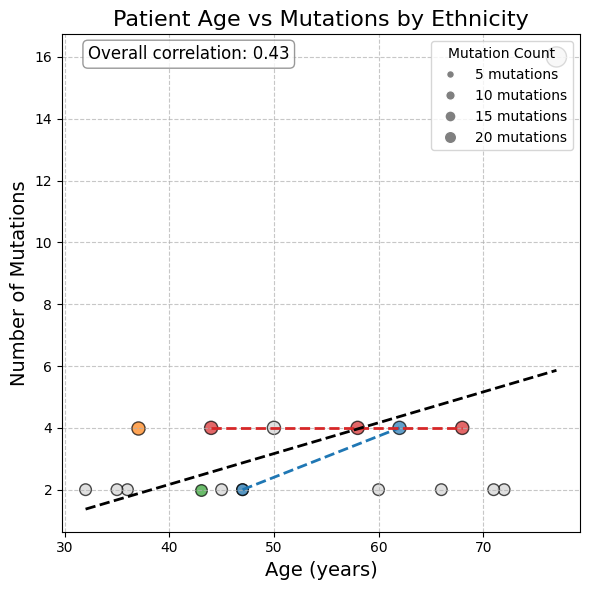

Mutation Statistics by Ethnicity:
          MUTATION_COUNT                               AGE        
                    mean median       std count       mean min max
ETHNICITY                                                         
ASIAN           3.000000    3.0  1.414214     2  54.500000  47  62
BRAZALIAN       4.000000    4.0  0.000000     3  56.666667  44  68
CAUCASIAN       2.000000    2.0       NaN     1  43.000000  43  43
Unknown         3.454545    2.0  4.203894    11  53.727273  32  77
WHITE           4.000000    4.0       NaN     1  37.000000  37  37


In [ ]:
#ethnicity vs age vs mutations
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D

# Create a dataframe from the patient metadata
df_patients = pd.DataFrame(patient_metadata)
df_patients['AGE'] = df_patients['AGE'].astype(int)

# Calculate mutation counts per patient - assuming MUTATION_RAW is a dictionary
# with patient IDs as keys and lists of Mutation objects as values
patient_mutation_counts = {}
for patient_id, mutations in mutations_dict.items():
    patient_mutation_counts[patient_id] = len(mutations)

# Create a new dataframe with age, ethnicity, and mutation counts
age_ethnicity_mutation_data = []
for patient in patient_metadata:
    patient_id = patient['ID']
    if patient_id in patient_mutation_counts:
        age_ethnicity_mutation_data.append({
            'ID': patient_id,
            'AGE': int(patient['AGE']),
            'ETHNICITY': patient['ETHNICITY'] if patient['ETHNICITY'] != "UNKOWN" else "Unknown",
            'MUTATION_COUNT': patient_mutation_counts[patient_id],
            'TUMOUR_LOCATION': patient['TUMOUR LOCATION'] if patient['TUMOUR LOCATION'] != "UNKOWN" else "Unknown"
        })

df_final = pd.DataFrame(age_ethnicity_mutation_data)

# Set up the figure
plt.figure(figsize=(6, 6))

# Define ethnicity color mapping
ethnicities = [e for e in df_final['ETHNICITY'].unique() if e != "Unknown"]
ethnicity_colors = sns.color_palette("tab10", len(ethnicities))
ethnicity_color_map = dict(zip(ethnicities, ethnicity_colors))
ethnicity_color_map["Unknown"] = "lightgray"  # Unknown ethnicity gets gray

# Define marker sizes based on mutation count
size_scale = 10  # Adjust this to scale the marker sizes appropriately

# Create scatter plot with color by ethnicity and size by mutation count
for ethnicity in df_final['ETHNICITY'].unique():
    subset = df_final[df_final['ETHNICITY'] == ethnicity]
    if not subset.empty:
        plt.scatter(subset['AGE'], subset['MUTATION_COUNT'],
                   label=ethnicity,
                   alpha=0.7,
                   s=subset['MUTATION_COUNT'] * size_scale + 50,  # Base size + scaled mutation count
                   color=ethnicity_color_map.get(ethnicity),
                   edgecolor='black')

# Add regression lines by ethnicity
for ethnicity in [e for e in df_final['ETHNICITY'].unique() if e != "Unknown"]:
    subset = df_final[df_final['ETHNICITY'] == ethnicity]
    if len(subset) >= 2:
        x = subset['AGE']
        y = subset['MUTATION_COUNT']
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        plt.plot(np.sort(x), p(np.sort(x)), "--",
                 color=ethnicity_color_map.get(ethnicity),
                 linewidth=2)

# Add overall regression line
if len(df_final) >= 2:
    x = df_final['AGE']
    y = df_final['MUTATION_COUNT']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(np.sort(x), p(np.sort(x)), "k--", linewidth=2, label=f"Overall trend")

    correlation = np.corrcoef(x, y)[0,1]
    plt.annotate(f"Overall correlation: {correlation:.2f}",
                xy=(0.05, 0.95), xycoords='axes fraction',
                fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Enhance the plot
plt.title('Patient Age vs Mutations by Ethnicity', fontsize=16)
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Number of Mutations', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# custom legend for marker sizes
size_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
           markersize=np.sqrt((count * size_scale + 50)/np.pi), label=f"{count} mutations")
    for count in [5, 10, 15, 20]  # Example values for legend
]

# Add two separate legends
plt.legend(title="Ethnicity", loc="upper left")
plt.legend(handles=size_handles, title="Mutation Count", loc="upper right")

plt.tight_layout()
plt.show()

# Additional analysis: Stats by Ethnicity
print("Mutation Statistics by Ethnicity:")
ethnicity_stats = df_final.groupby('ETHNICITY').agg({
    'MUTATION_COUNT': ['mean', 'median', 'std', 'count'],
    'AGE': ['mean', 'min', 'max']
})
print(ethnicity_stats)

# heatmap to visualize ethnicity vs mutation types
if 'kind' in df_final.columns:  # If mutation type data is available
    plt.figure(figsize=(6, 6))
    ethnicity_mutation_pivot = df_final.pivot_table(
        index='ETHNICITY',
        columns='kind',
        values='MUTATION_COUNT',
        aggfunc='sum',
        fill_value=0
    )
    sns.heatmap(ethnicity_mutation_pivot, annot=True, cmap="YlGnBu", linewidths=0.5)
    plt.title('Mutation Types by Ethnicity', fontsize=16)
    plt.tight_layout()
    plt.show()